Aproximace svačinového sáčku jako kvádr (pro aproximaci objemu)
23 x 13 x 2,5 cm^3 = cca 0.00075076 cm^2


Odhadujeme optimální polohu míčků 1/4 od kraje (1/2 mezi nimi)
    - Aby se navzájem neovlivňovali, ale zároveň se ovlivnil co nejvíc vzduchu

míčky
    - zelený (malý) m = 0,0084 kg
    - zelený (velký) m = 0,0474 kg
    - duha (malý) m = 0,0101 kg
    - duha (velký) m = 0,0268 kg
    - modrý m = 0,0505 kg
    - Zlatý m = 0,0199 kg
    - Ještěrka m = 0,0381 kg


Prkno má šířku 9,8 cm
    - Sice takhle nepokryje celou polovinu, ale je tam dost místa na to, aby dopad neovlinil míček prohloubením
    - Takhle plocha dopadu 9,8 x 13 cm^2 = 0,1274
    - Výška prkna = 0,017 cm
    - Délka celého prkna = 0,70 cm

Měření plochy míče jako píst
    - S = dV/dy
    - dV změříme přes položené prkno dřeva a změna úhlu
    - 40 páka 30 extra

    - kovový míček m = 


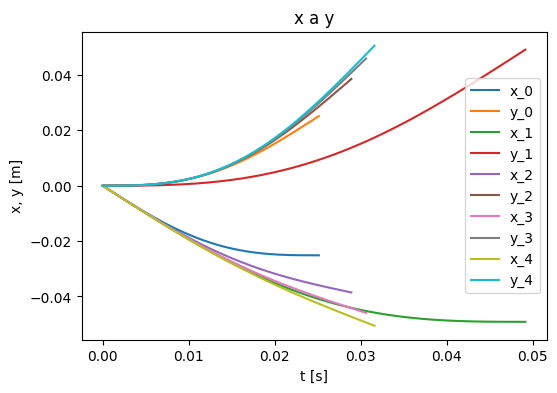

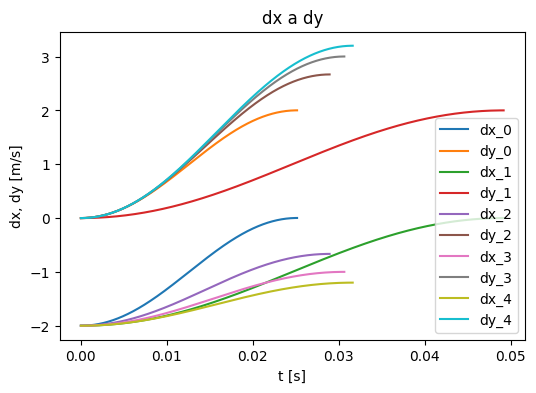

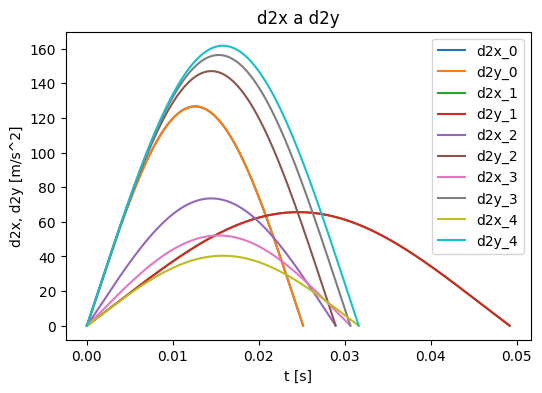

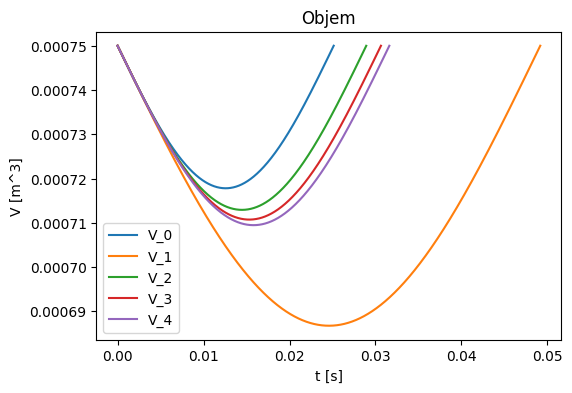

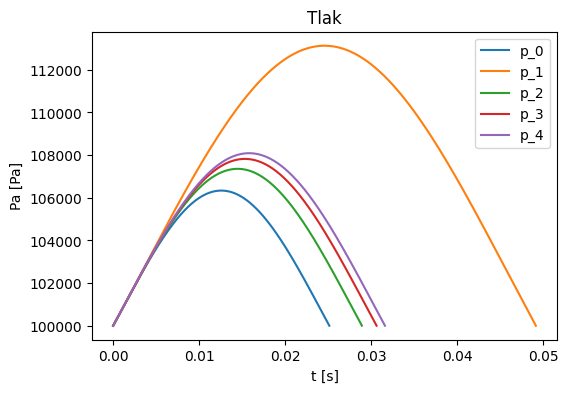

In [1]:
import matplotlib.pyplot as plt

data = []

def S1(x): # m^2
    # return x
    return 0.002

def S2(x): # m^2
    # return x
    return 0.002

# Default values
m1 = 0.2 # kg
m2 = 0.1 # kg
# S1 = 0.002 # m^2
# S2 = 0.002 # m^2
initV = 0.00075 # m^3
initp = 100000 # Pa
v0 = -2 # m/s

def instance(m1 = m1, m2 = m2, initV = initV, initp = initp, v0 = v0):
    instanceData = [[], [], [], [], [], [], [], [], [], [], []]
    # t, x, dx, d2x, y, dy, d2y, V, p, S1, S2
    # 0, 1,  2,   3, 4,  5,   6, 7, 8,  9, 10

    K = 1.4 # konstanta
    dt = 0.000005 # s

    # Parameters
    # Začátek = moment nárazu

    V = initV # m^3
    p = initp # Pa
    t = 0 # s
    x = 0 # m    objekt, který naráží
    dx = v0 # dx/dt
    d2x = (p-initp)*S1(x) # d2x/d2t
    y = 0 # m   objekt, který letí
    dy = 0 # dy/dt
    d2y = (p-initp)*S2(y) # d2y/d2t
    
    values = [t, x, dx, d2x, y, dy ,d2y, V, p, S1(x), S2(y)]
    for i in range(len(values)): instanceData[i].append(values[i])
    
    iterator = 0
    while (p >= initp):
    # while(iterator < 50000):
        iterator += 1
        values = [t, x, dx, d2x, y, dy ,d2y, V, p, S1(x), S2(y)]
        for i in range(len(values)): instanceData[i].append(values[i])

        oldX = x
        oldY = y
        oldV = V

        t = round(t+dt, 12)
        x = round(x+dx*dt, 12)
        dx = round(dx+d2x*dt, 12)
        d2x = round((p-initp)*S1(x)/m1, 12)

        y = round(y+dy*dt, 12)
        dy = round(dy+d2y*dt, 12)
        d2y = round((p-initp)*S2(y)/m2, 12)

        V = round(V+(x-oldX)*S1(x) + (y-oldY)*S2(y), 12)
        p = round(p*pow(oldV/V, K), 12)

    return instanceData

data.append(instance(m1 = 0.1, m2 = 0.1))
data.append(instance(m1 = 0.4, m2 = 0.4))
data.append(instance(m1 = 0.2, m2 = 0.1))
data.append(instance(m1 = 0.3, m2 = 0.1))
data.append(instance(m1 = 0.4, m2 = 0.1))


plt.rcParams['figure.figsize'] = [6, 4]

for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], label = f"x_{i}")
    plt.plot(data[i][0], data[i][4], label = f"y_{i}")
    plt.title("x a y")
    plt.ylabel("x, y [m]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][2], label = f"dx_{i}")
    plt.plot(data[i][0], data[i][5], label = f"dy_{i}")
    plt.title("dx a dy")
    plt.ylabel("dx, dy [m/s]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][3], label = f"d2x_{i}")
    plt.plot(data[i][0], data[i][6], label = f"d2y_{i}")
    plt.title("d2x a d2y")
    plt.ylabel("d2x, d2y [m/s^2]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][7], label = f"V_{i}")
    plt.title("Objem")
    plt.ylabel("V [m^3]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    plt.plot(data[i][0], data[i][8], label = f"p_{i}")
    plt.title("Tlak")
    plt.ylabel("Pa [Pa]")
    plt.xlabel("t [s]")
    plt.legend()
plt.show()

for i in range(len(data)):
    with open(f"./outData/data_{i}.csv", 'w') as file:
        file.write("t,x,dx,d2x,y,dy,d2y,p,V,S1,S2")
        for line in range(len(data[i][0])):
            file.write(",".join([str(x[line]) for x in data[i]]))
            file.write("\n")